## Intro to Dataframes

In [4]:
import pandas as pd
import numpy as np

In [6]:
df = pd.DataFrame([[1,2,3],[4,5,6],[7,8,9],[10,11,12]], columns=["A", "B", "C"], index=["x","y","z",'zz'])

In [8]:
df.head()

,A,B,C
x,1,2,3
y,4,5,6
z,7,8,9
zz,10,11,12


In [10]:
df.tail(2)

,A,B,C
z,7,8,9
zz,10,11,12


In [12]:
df.columns

Index(['A', 'B', 'C'], dtype='object')

In [14]:
df.index.tolist()

['x', 'y', 'z', 'zz']

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, x to zz
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   A       4 non-null      int64
 1   B       4 non-null      int64
 2   C       4 non-null      int64
dtypes: int64(3)
memory usage: 128.0+ bytes


In [18]:
df.describe()

,A,B,C
count,4.000000,4.000000,4.000000
mean,5.500000,6.500000,7.500000
std,3.872983,3.872983,3.872983
min,1.000000,2.000000,3.000000
25%,3.250000,4.250000,5.250000
50%,5.500000,6.500000,7.500000
75%,7.750000,8.750000,9.750000
max,10.000000,11.000000,12.000000


In [20]:
df.nunique()

A    4
B    4
C    4
dtype: int64

In [22]:
df['A'].unique()

array([ 1,  4,  7, 10])

In [24]:
df.shape

(4, 3)

In [26]:
df.size

12

In [28]:
df

,A,B,C
x,1,2,3
y,4,5,6
z,7,8,9
zz,10,11,12


## Loading in Dataframes from Files

In [31]:
coffee = pd.read_csv('./warmup-data/coffee.csv')

In [33]:
results = pd.read_parquet('./data/results.parquet')
bios = pd.read_csv('./data/bios.csv')

In [34]:
## To read an excel spreadsheet
olympics_data = pd.read_excel('./data/olympics-data.xlsx', sheet_name="results")

## Accessing Data with Pandas

In [37]:
print(coffee)

          Day Coffee Type  Units Sold
0      Monday    Espresso          25
1      Monday       Latte          15
2     Tuesday    Espresso          30
3     Tuesday       Latte          20
4   Wednesday    Espresso          35
5   Wednesday       Latte          25
6    Thursday    Espresso          40
7    Thursday       Latte          30
8      Friday    Espresso          45
9      Friday       Latte          35
10   Saturday    Espresso          45
11   Saturday       Latte          35
12     Sunday    Espresso          45
13     Sunday       Latte          35


In [40]:
display(coffee)

,Day,Coffee Type,Units Sold
0,Monday,Espresso,25
1,Monday,Latte,15
2,Tuesday,Espresso,30
3,Tuesday,Latte,20
4,Wednesday,Espresso,35
5,Wednesday,Latte,25
6,Thursday,Espresso,40
7,Thursday,Latte,30
8,Friday,Espresso,45
9,Friday,Latte,35


In [42]:
coffee.head()

,Day,Coffee Type,Units Sold
0,Monday,Espresso,25
1,Monday,Latte,15
2,Tuesday,Espresso,30
3,Tuesday,Latte,20
4,Wednesday,Espresso,35


In [44]:
coffee.tail(10)

,Day,Coffee Type,Units Sold
4,Wednesday,Espresso,35
5,Wednesday,Latte,25
6,Thursday,Espresso,40
7,Thursday,Latte,30
8,Friday,Espresso,45
9,Friday,Latte,35
10,Saturday,Espresso,45
11,Saturday,Latte,35
12,Sunday,Espresso,45
13,Sunday,Latte,35


In [46]:
coffee.sample(5) # Pass in random_state to make deterministic

,Day,Coffee Type,Units Sold
3,Tuesday,Latte,20
5,Wednesday,Latte,25
9,Friday,Latte,35
13,Sunday,Latte,35
7,Thursday,Latte,30


In [48]:
# loc
# coffee.loc[Rows, Columns]

coffee.loc[0]

Day              Monday
Coffee Type    Espresso
Units Sold           25
Name: 0, dtype: object

In [50]:
coffee.loc[[0,1,5]]

,Day,Coffee Type,Units Sold
0,Monday,Espresso,25
1,Monday,Latte,15
5,Wednesday,Latte,25


In [52]:
coffee.loc[5:9, ["Day", "Units Sold"]]

,Day,Units Sold
5,Wednesday,25
6,Thursday,40
7,Thursday,30
8,Friday,45
9,Friday,35


#### iloc

In [55]:
coffee.iloc[:, [0,2]]

,Day,Units Sold
0,Monday,25
1,Monday,15
2,Tuesday,30
3,Tuesday,20
4,Wednesday,35
5,Wednesday,25
6,Thursday,40
7,Thursday,30
8,Friday,45
9,Friday,35


#### Other Stuff

In [58]:
coffee.index = coffee["Day"]

In [60]:
coffee.loc["Monday":"Wednesday"]

,Day,Coffee Type,Units Sold
Day,,,
Monday,Monday,Espresso,25
Monday,Monday,Latte,15
Tuesday,Tuesday,Espresso,30
Tuesday,Tuesday,Latte,20
Wednesday,Wednesday,Espresso,35
Wednesday,Wednesday,Latte,25


In [62]:
coffee = pd.read_csv('./warmup-data/coffee.csv')

#### Setting Values

In [65]:
coffee.loc[1:3, "Units Sold"] = 10

#### Optimized way to get single values (.at & .iat)

In [68]:
coffee.at[0,"Units Sold"]

25

In [70]:
coffee.iat[3,1]

'Latte'

#### Getting Columns

In [73]:
coffee.Day

0        Monday
1        Monday
2       Tuesday
3       Tuesday
4     Wednesday
5     Wednesday
6      Thursday
7      Thursday
8        Friday
9        Friday
10     Saturday
11     Saturday
12       Sunday
13       Sunday
Name: Day, dtype: object

In [75]:
coffee["Day"]

0        Monday
1        Monday
2       Tuesday
3       Tuesday
4     Wednesday
5     Wednesday
6      Thursday
7      Thursday
8        Friday
9        Friday
10     Saturday
11     Saturday
12       Sunday
13       Sunday
Name: Day, dtype: object

#### Sort Values

In [78]:
coffee.sort_values(["Units Sold"], ascending=False)

,Day,Coffee Type,Units Sold
8,Friday,Espresso,45
10,Saturday,Espresso,45
12,Sunday,Espresso,45
6,Thursday,Espresso,40
4,Wednesday,Espresso,35
9,Friday,Latte,35
11,Saturday,Latte,35
13,Sunday,Latte,35
7,Thursday,Latte,30
0,Monday,Espresso,25


In [80]:
coffee.sort_values(["Units Sold", "Coffee Type"], ascending=[0,1])

,Day,Coffee Type,Units Sold
8,Friday,Espresso,45
10,Saturday,Espresso,45
12,Sunday,Espresso,45
6,Thursday,Espresso,40
4,Wednesday,Espresso,35
9,Friday,Latte,35
11,Saturday,Latte,35
13,Sunday,Latte,35
7,Thursday,Latte,30
0,Monday,Espresso,25


#### Iterate over dataframe with for loop

In [83]:
for index, row in coffee.iterrows():
    print(index)
    print(row)
    print("Coffee Type of Row:", row["Coffee Type"])

0
Day              Monday
Coffee Type    Espresso
Units Sold           25
Name: 0, dtype: object
Coffee Type of Row: Espresso
1
Day            Monday
Coffee Type     Latte
Units Sold         10
Name: 1, dtype: object
Coffee Type of Row: Latte
2
Day             Tuesday
Coffee Type    Espresso
Units Sold           10
Name: 2, dtype: object
Coffee Type of Row: Espresso
3
Day            Tuesday
Coffee Type      Latte
Units Sold          10
Name: 3, dtype: object
Coffee Type of Row: Latte
4
Day            Wednesday
Coffee Type     Espresso
Units Sold            35
Name: 4, dtype: object
Coffee Type of Row: Espresso
5
Day            Wednesday
Coffee Type        Latte
Units Sold            25
Name: 5, dtype: object
Coffee Type of Row: Latte
6
Day            Thursday
Coffee Type    Espresso
Units Sold           40
Name: 6, dtype: object
Coffee Type of Row: Espresso
7
Day            Thursday
Coffee Type       Latte
Units Sold           30
Name: 7, dtype: object
Coffee Type of Row: Latte
8
Day  

## Filtering Data

In [86]:
bios.head()

,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date
0,1,Jean-François Blanchy,1886-12-12,Bordeaux,Gironde,FRA,France,NaN,NaN,1960-10-02
1,2,Arnaud Boetsch,1969-04-01,Meulan,Yvelines,FRA,France,183.0,76.0,NaN
2,3,Jean Borotra,1898-08-13,Biarritz,Pyrénées-Atlantiques,FRA,France,183.0,76.0,1994-07-17
3,4,Jacques Brugnon,1895-05-11,Paris VIIIe,Paris,FRA,France,168.0,64.0,1978-03-20
4,5,Albert Canet,1878-04-17,Wandsworth,England,GBR,France,NaN,NaN,1930-07-25


In [37]:
bios.loc[bios["height_cm"] > 215]

,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date
5089,5108,Viktor Pankrashkin,1957-06-19,Moskva (Moscow),Moskva,RUS,Soviet Union,220.0,112.0,1993-07-24
5583,5606,Paulinho Villas Boas,1963-01-26,São Paulo,São Paulo,BRA,Brazil,217.0,106.0,NaN
5673,5696,Gunther Behnke,1963-01-19,Leverkusen,Nordrhein-Westfalen,GER,Germany,221.0,114.0,NaN
5716,5739,Uwe Blab,1962-03-26,München (Munich),Bayern,GER,Germany West Germany,218.0,110.0,NaN
5781,5804,Tommy Burleson,1952-02-24,Crossnore,North Carolina,USA,United States,223.0,102.0,NaN
5796,5819,Andy Campbell,1956-07-21,Melbourne,Victoria,AUS,Australia,218.0,93.0,NaN
6223,6250,Lars Hansen,1954-09-27,København (Copenhagen),Hovedstaden,DEN,Canada,216.0,105.0,NaN
6270,6298,Hu Zhangbao,1963-04-05,NaN,NaN,NaN,People's Republic of China,216.0,135.0,NaN
6409,6440,Sergey Kovalenko,1947-08-11,NaN,NaN,NaN,Soviet Union,216.0,111.0,2004-11-18
6420,6451,Jānis Krūmiņš,1930-01-30,Cēsis,Cēsu novads,LAT,Soviet Union,218.0,141.0,1994-11-20


In [88]:
bios.loc[bios["height_cm"] > 215, ["name", "height_cm"]]

,name,height_cm
5089,Viktor Pankrashkin,220.0
5583,Paulinho Villas Boas,217.0
5673,Gunther Behnke,221.0
5716,Uwe Blab,218.0
5781,Tommy Burleson,223.0
5796,Andy Campbell,218.0
6223,Lars Hansen,216.0
6270,Hu Zhangbao,216.0
6409,Sergey Kovalenko,216.0
6420,Jānis Krūmiņš,218.0


#### Short-hand syntax (without .loc)

In [91]:
bios[bios['height_cm'] > 215][["name","height_cm"]]

,name,height_cm
5089,Viktor Pankrashkin,220.0
5583,Paulinho Villas Boas,217.0
5673,Gunther Behnke,221.0
5716,Uwe Blab,218.0
5781,Tommy Burleson,223.0
5796,Andy Campbell,218.0
6223,Lars Hansen,216.0
6270,Hu Zhangbao,216.0
6409,Sergey Kovalenko,216.0
6420,Jānis Krūmiņš,218.0


#### Multiple filter conditions

In [94]:
bios[(bios['height_cm'] > 215) & (bios['born_country']=='USA')]

,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date
5781,5804,Tommy Burleson,1952-02-24,Crossnore,North Carolina,USA,United States,223.0,102.0,NaN
6722,6755,Shaquille O'Neal,1972-03-06,Newark,New Jersey,USA,United States,216.0,137.0,NaN
6937,6972,David Robinson,1965-08-06,Key West,Florida,USA,United States,216.0,107.0,NaN
123850,126093,Tyson Chandler,1982-10-02,Hanford,California,USA,United States,216.0,107.0,NaN


#### Filter by string conditions

In [97]:
bios[bios['name'].str.contains("puri", case=False)]

,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date
47922,48274,Sangeeta Puri,1979-12-04,NaN,NaN,NaN,India,NaN,NaN,NaN
54687,55081,Ymer Pampuri,1944-04-30,Tirana,Tirana,ALB,Albania,NaN,NaN,2017-01-18
71273,71812,Patrizia Spuri,1973-02-18,Fara in Sabina,Rieti,ITA,Italy,170.0,60.0,NaN
95867,96641,Mariano Puricelli,1974-02-25,San Carlos de Bariloche,Río Negro,ARG,Argentina,NaN,NaN,NaN
107595,108728,Mikhail Chipurin,1980-11-17,Moskva (Moscow),Moskva,RUS,Russian Federation,190.0,105.0,NaN
141270,144810,Purity Kirui,1991-08-13,NaN,NaN,NaN,Kenya,NaN,NaN,NaN


In [99]:
# Regex syntax
bios[bios['name'].str.contains('bharat|puri', case=False)]

,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date
47922,48274,Sangeeta Puri,1979-12-04,NaN,NaN,NaN,India,NaN,NaN,NaN
54687,55081,Ymer Pampuri,1944-04-30,Tirana,Tirana,ALB,Albania,NaN,NaN,2017-01-18
56019,56416,Bharat Sawad,1968-01-01,NaN,NaN,NaN,Nepal,161.0,50.0,NaN
71273,71812,Patrizia Spuri,1973-02-18,Fara in Sabina,Rieti,ITA,Italy,170.0,60.0,NaN
95867,96641,Mariano Puricelli,1974-02-25,San Carlos de Bariloche,Río Negro,ARG,Argentina,NaN,NaN,NaN
107595,108728,Mikhail Chipurin,1980-11-17,Moskva (Moscow),Moskva,RUS,Russian Federation,190.0,105.0,NaN
119069,120851,Bharat Kumar Chetri,1981-12-15,Darjeeling,West Bengal,IND,India,174.0,75.0,NaN
141270,144810,Purity Kirui,1991-08-13,NaN,NaN,NaN,Kenya,NaN,NaN,NaN


In [101]:
# Other cool regex filters

# Find athletes born in cities that start with a vowel:
vowel_cities = bios[bios['born_city'].str.contains(r'^[AEIOUaeiou]', na=False)]

# Find athletes with names that contain exactly two vowels:
two_vowels = bios[bios['name'].str.contains(r'^[^AEIOUaeiou]*[AEIOUaeiou][^AEIOUaeiou]*[AEIOUaeiou][^AEIOUaeiou]*$', na=False)]

# Find athletes with names that have repeated consecutive letters (e.g., "Aaron", "Emmett"):
repeated_letters = bios[bios['name'].str.contains(r'(.)\1', na=False)]

# Find athletes with names ending in 'son' or 'sen':
son_sen_names = bios[bios['name'].str.contains(r'son$|sen$', case=False, na=False)]

# Find athletes born in a year starting with '19':
born_19xx = bios[bios['born_date'].str.contains(r'^19', na=False)]

# Find athletes with names that do not contain any vowels:
no_vowels = bios[bios['name'].str.contains(r'^[^AEIOUaeiou]*$', na=False)]

# Find athletes whose names contain a hyphen or an apostrophe:
hyphen_apostrophe = bios[bios['name'].str.contains(r"[-']", na=False)]

# Find athletes with names that start and end with the same letter:
start_end_same = bios[bios['name'].str.contains(r'^(.).*\1$', na=False, case=False)]

# Find athletes with a born_city that has exactly 7 characters:
city_seven_chars = bios[bios['born_city'].str.contains(r'^.{7}$', na=False)]

# Find athletes with names containing three or more vowels:
three_or_more_vowels = bios[bios['name'].str.contains(r'([AEIOUaeiou].*){3,}', na=False)]


/var/folders/8g/kz6p4g7s5s546qr4n5rm10t00000gn/T/ipykernel_1606/237546082.py:10: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  repeated_letters = bios[bios['name'].str.contains(r'(.)\1', na=False)]
/var/folders/8g/kz6p4g7s5s546qr4n5rm10t00000gn/T/ipykernel_1606/237546082.py:25: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  start_end_same = bios[bios['name'].str.contains(r'^(.).*\1$', na=False, case=False)]
/var/folders/8g/kz6p4g7s5s546qr4n5rm10t00000gn/T/ipykernel_1606/237546082.py:31: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  three_or_more_vowels = bios[bios['name'].str.contains(r'([AEIOUaeiou].*){3,}', na=False)]


In [103]:
# Don't use regex search (exact match)
bios[bios['name'].str.contains('bharat|puri', case=False, regex=False)]

,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date


In [105]:
## isin method & startswith
bios[bios['born_country'].isin(["USA", "FRA", "GBR"]) & (bios['name'].str.startswith("puri"))]

,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date


#### Query functions

In [113]:
bios.query('born_country == "India" and born_city == "NaN"')

,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date


## Adding / Removing Columns

In [115]:
coffee.head()

,Day,Coffee Type,Units Sold
0,Monday,Espresso,25
1,Monday,Latte,10
2,Tuesday,Espresso,10
3,Tuesday,Latte,10
4,Wednesday,Espresso,35


In [117]:
coffee['price'] = 4.99

In [119]:
coffee['new_price'] = np.where(coffee['Coffee Type']=='Espresso', 3.99, 5.99) 

In [121]:
coffee

,Day,Coffee Type,Units Sold,price,new_price
0,Monday,Espresso,25,4.99,3.99
1,Monday,Latte,10,4.99,5.99
2,Tuesday,Espresso,10,4.99,3.99
3,Tuesday,Latte,10,4.99,5.99
4,Wednesday,Espresso,35,4.99,3.99
5,Wednesday,Latte,25,4.99,5.99
6,Thursday,Espresso,40,4.99,3.99
7,Thursday,Latte,30,4.99,5.99
8,Friday,Espresso,45,4.99,3.99
9,Friday,Latte,35,4.99,5.99


In [123]:
coffee.drop(columns=['price'], inplace=True)

# the below would also have worked
# coffee = coffee.drop(columns=['price'])

In [125]:
coffee = coffee[['Day', 'Coffee Type', 'Units Sold', 'new_price']]

In [127]:
coffee['revenue'] = coffee['Units Sold'] * coffee['new_price']

In [129]:
coffee

,Day,Coffee Type,Units Sold,new_price,revenue
0,Monday,Espresso,25,3.99,99.75
1,Monday,Latte,10,5.99,59.90
2,Tuesday,Espresso,10,3.99,39.90
3,Tuesday,Latte,10,5.99,59.90
4,Wednesday,Espresso,35,3.99,139.65
5,Wednesday,Latte,25,5.99,149.75
6,Thursday,Espresso,40,3.99,159.60
7,Thursday,Latte,30,5.99,179.70
8,Friday,Espresso,45,3.99,179.55
9,Friday,Latte,35,5.99,209.65


In [131]:
coffee.rename(columns={'new_price': 'price'}, inplace=True)

In [133]:
bios_new = bios.copy()

In [135]:
bios_new['first_name'] = bios_new['name'].str.split(' ').str[0]

In [139]:
bios_new.query('first_name == "Jack"')

,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date,first_name
1027,1034,Jack Nielsen,1896-08-03,NaN,NaN,NaN,Norway,NaN,NaN,1981-01-09,Jack
1141,1148,Jack Butula,1931-01-01,NaN,NaN,NaN,Canada,NaN,NaN,1992-06-26,Jack
1182,1189,Jack Keenan,1929-09-14,Montréal,Québec,CAN,Canada,NaN,NaN,2009-06-21,Jack
2504,2516,Jack Condon,1903-09-09,Johannesburg,Gauteng,RSA,South Africa,NaN,NaN,1967-01-01,Jack
3384,3396,Jack Elliott,1901-10-12,Hoxton,England,GBR,Great Britain,NaN,NaN,1945-07-03,Jack
...,...,...,...,...,...,...,...,...,...,...,...
143657,147311,Jack Williams,2000-04-22,NaN,NaN,NaN,United States,NaN,NaN,NaN,Jack
143729,147384,Jack López,1992-12-16,Río Piedras,Puerto Rico,PUR,United States,178.0,73.0,NaN,Jack
143795,147451,Jack Leverett,2000-01-18,Bainbridge,Georgia,USA,United States,173.0,NaN,NaN,Jack
144292,147980,Jack McBain,2000-01-06,Toronto,Ontario,CAN,Canada,193.0,NaN,NaN,Jack


In [141]:
bios_new['born_datetime'] = pd.to_datetime(bios_new['born_date'])

In [143]:
bios_new['born_year'] = bios_new['born_datetime'].dt.year

In [145]:
bios_new[['name','born_year']]

,name,born_year
0,Jean-François Blanchy,1886.0
1,Arnaud Boetsch,1969.0
2,Jean Borotra,1898.0
3,Jacques Brugnon,1895.0
4,Albert Canet,1878.0
...,...,...
145495,Polina Luchnikova,2002.0
145496,Valeriya Merkusheva,1999.0
145497,Yuliya Smirnova,1998.0
145498,André Foussard,1899.0


In [147]:
bios_new.to_csv('./data/bios_new.csv', index=False)

In [149]:
bios['height_category'] = bios['height_cm'].apply(lambda x: 'Short' if x < 165 else ('Average' if x < 185 else 'Tall'))

In [151]:
def categorize_athlete(row):
    if row['height_cm'] < 175 and row['weight_kg'] < 70:
        return 'Lightweight'
    elif row['height_cm'] < 185 or row['weight_kg'] <= 80:
        return 'Middleweight'
    
    else:
        return 'Heavyweight'
    
bios['Category'] = bios.apply(categorize_athlete, axis=1)

In [153]:
bios.head()

,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date,height_category,Category
0,1,Jean-François Blanchy,1886-12-12,Bordeaux,Gironde,FRA,France,NaN,NaN,1960-10-02,Tall,Heavyweight
1,2,Arnaud Boetsch,1969-04-01,Meulan,Yvelines,FRA,France,183.0,76.0,NaN,Average,Middleweight
2,3,Jean Borotra,1898-08-13,Biarritz,Pyrénées-Atlantiques,FRA,France,183.0,76.0,1994-07-17,Average,Middleweight
3,4,Jacques Brugnon,1895-05-11,Paris VIIIe,Paris,FRA,France,168.0,64.0,1978-03-20,Average,Lightweight
4,5,Albert Canet,1878-04-17,Wandsworth,England,GBR,France,NaN,NaN,1930-07-25,Tall,Heavyweight


## Merging & Concatenating Data

In [155]:
nocs = pd.read_csv('./data/noc_regions.csv')

In [157]:
bios_new = pd.merge(bios, nocs, left_on='born_country', right_on='NOC', how='left')

In [212]:
bios_new.rename(columns={'region': 'born_country_full'}, inplace=True)

In [159]:
usa = bios[bios['born_country']=='USA'].copy()
gbr = bios[bios['born_country']=='GBR'].copy()

In [161]:
new_df = pd.concat([usa,gbr])

In [163]:
new_df.tail()

,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date,height_category,Category
144811,148512,Benjamin Alexander,1983-05-08,London,England,GBR,Jamaica,NaN,NaN,NaN,Tall,Heavyweight
144815,148517,Ashley Watson,1993-10-28,Peterborough,England,GBR,Jamaica,NaN,NaN,NaN,Tall,Heavyweight
145005,148716,Peder Kongshaug,2001-08-13,Wimbledon,England,GBR,Norway,184.0,86.0,NaN,Average,Middleweight
145319,149041,Axel Brown,1992-04-02,Harrogate,England,GBR,Trinidad and Tobago,NaN,NaN,NaN,Tall,Heavyweight
145388,149111,Jean-Luc Baker,1993-10-07,Burnley,England,GBR,United States,NaN,NaN,NaN,Tall,Heavyweight


In [165]:
combined_df = pd.merge(results, bios, on='athlete_id', how='left')

In [167]:
combined_df.head()

,year,type,discipline,event,as,athlete_id,noc,team,place,tied,...,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date,height_category,Category
0,1912.0,Summer,Tennis,"Singles, Men (Olympic)",Jean-François Blanchy,1,FRA,None,17.0,True,...,1886-12-12,Bordeaux,Gironde,FRA,France,NaN,NaN,1960-10-02,Tall,Heavyweight
1,1912.0,Summer,Tennis,"Doubles, Men (Olympic)",Jean-François Blanchy,1,FRA,Jean Montariol,NaN,False,...,1886-12-12,Bordeaux,Gironde,FRA,France,NaN,NaN,1960-10-02,Tall,Heavyweight
2,1920.0,Summer,Tennis,"Singles, Men (Olympic)",Jean-François Blanchy,1,FRA,None,32.0,True,...,1886-12-12,Bordeaux,Gironde,FRA,France,NaN,NaN,1960-10-02,Tall,Heavyweight
3,1920.0,Summer,Tennis,"Doubles, Mixed (Olympic)",Jean-François Blanchy,1,FRA,Jeanne Vaussard,8.0,True,...,1886-12-12,Bordeaux,Gironde,FRA,France,NaN,NaN,1960-10-02,Tall,Heavyweight
4,1920.0,Summer,Tennis,"Doubles, Men (Olympic)",Jean-François Blanchy,1,FRA,Jacques Brugnon,4.0,False,...,1886-12-12,Bordeaux,Gironde,FRA,France,NaN,NaN,1960-10-02,Tall,Heavyweight


## Handling Null Values

In [169]:
coffee.loc[[2,3], 'Units Sold'] = np.nan

In [60]:
# Make sure to set this to your Units Sold column if you want these changes to stick
coffee['Units Sold'].fillna(coffee['Units Sold'].mean()) 

0     25.00
1     10.00
2     33.75
3     33.75
4     35.00
5     25.00
6     40.00
7     30.00
8     45.00
9     35.00
10    45.00
11    35.00
12    45.00
13    35.00
Name: Units Sold, dtype: float64

In [171]:
# coffee['Units Sold'] = coffee['Units Sold'].interpolate()
coffee['Units Sold'].interpolate()

0     25.000000
1     10.000000
2     18.333333
3     26.666667
4     35.000000
5     25.000000
6     40.000000
7     30.000000
8     45.000000
9     35.000000
10    45.000000
11    35.000000
12    45.000000
13    35.000000
Name: Units Sold, dtype: float64

In [173]:
coffee.dropna(subset=['Units Sold']) # Use inplace=True if you want to update the coffee df

,Day,Coffee Type,Units Sold,price,revenue
0,Monday,Espresso,25.0,3.99,99.75
1,Monday,Latte,10.0,5.99,59.90
4,Wednesday,Espresso,35.0,3.99,139.65
5,Wednesday,Latte,25.0,5.99,149.75
6,Thursday,Espresso,40.0,3.99,159.60
7,Thursday,Latte,30.0,5.99,179.70
8,Friday,Espresso,45.0,3.99,179.55
9,Friday,Latte,35.0,5.99,209.65
10,Saturday,Espresso,45.0,3.99,179.55
11,Saturday,Latte,35.0,5.99,209.65


In [175]:
coffee[coffee['Units Sold'].notna()]

,Day,Coffee Type,Units Sold,price,revenue
0,Monday,Espresso,25.0,3.99,99.75
1,Monday,Latte,10.0,5.99,59.90
4,Wednesday,Espresso,35.0,3.99,139.65
5,Wednesday,Latte,25.0,5.99,149.75
6,Thursday,Espresso,40.0,3.99,159.60
7,Thursday,Latte,30.0,5.99,179.70
8,Friday,Espresso,45.0,3.99,179.55
9,Friday,Latte,35.0,5.99,209.65
10,Saturday,Espresso,45.0,3.99,179.55
11,Saturday,Latte,35.0,5.99,209.65


In [177]:
coffee

,Day,Coffee Type,Units Sold,price,revenue
0,Monday,Espresso,25.0,3.99,99.75
1,Monday,Latte,10.0,5.99,59.90
2,Tuesday,Espresso,NaN,3.99,39.90
3,Tuesday,Latte,NaN,5.99,59.90
4,Wednesday,Espresso,35.0,3.99,139.65
5,Wednesday,Latte,25.0,5.99,149.75
6,Thursday,Espresso,40.0,3.99,159.60
7,Thursday,Latte,30.0,5.99,179.70
8,Friday,Espresso,45.0,3.99,179.55
9,Friday,Latte,35.0,5.99,209.65


## Aggregating Data

In [77]:
bios.head()

,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date
0,1,Jean-François Blanchy,1886-12-12,Bordeaux,Gironde,FRA,France,NaN,NaN,1960-10-02
1,2,Arnaud Boetsch,1969-04-01,Meulan,Yvelines,FRA,France,183.0,76.0,NaN
2,3,Jean Borotra,1898-08-13,Biarritz,Pyrénées-Atlantiques,FRA,France,183.0,76.0,1994-07-17
3,4,Jacques Brugnon,1895-05-11,Paris VIIIe,Paris,FRA,France,168.0,64.0,1978-03-20
4,5,Albert Canet,1878-04-17,Wandsworth,England,GBR,France,NaN,NaN,1930-07-25


In [78]:
bios['born_city'].value_counts()

born_city
Budapest           1378
Moskva (Moscow)     883
Oslo                708
Stockholm           629
Praha (Prague)      600
                   ... 
Bodrogkisfalud        1
Ternberg              1
Klaus                 1
Plaški                1
Dulwich Hill          1
Name: count, Length: 22368, dtype: int64

In [180]:
bios[bios['born_country']=='USA']['born_region'].value_counts().head(10)

born_region
California       1634
New York          990
Illinois          585
Pennsylvania      530
Massachusetts     530
New Jersey        381
Texas             368
Minnesota         365
Ohio              328
Michigan          319
Name: count, dtype: int64

In [182]:
bios[bios['born_country']=='USA']['born_region'].value_counts().tail(25)

born_region
Utah              91
Missouri          91
North Carolina    86
Arizona           83
New Hampshire     83
Vermont           68
Mississippi       66
Alabama           64
Kentucky          62
Tennessee         62
Nebraska          60
Rhode Island      56
Montana           55
South Carolina    50
Maine             50
Alaska            45
Arkansas          42
Idaho             41
New Mexico        38
Nevada            36
South Dakota      27
West Virginia     24
Delaware          22
North Dakota      16
Wyoming           14
Name: count, dtype: int64

#### Groupby function in Pandas

In [184]:
coffee.groupby(['Coffee Type'])['Units Sold'].sum()

Coffee Type
Espresso    235.0
Latte       170.0
Name: Units Sold, dtype: float64

In [186]:
coffee.groupby(['Coffee Type'])['Units Sold'].mean()

Coffee Type
Espresso    39.166667
Latte       28.333333
Name: Units Sold, dtype: float64

In [188]:
coffee.groupby(['Coffee Type', 'Day']).agg({'Units Sold': 'sum', 'price': 'mean'})

Units Sold  price
Coffee Type Day                         
Espresso    Friday           45.0   3.99
            Monday           25.0   3.99
            Saturday         45.0   3.99
            Sunday           45.0   3.99
            Thursday         40.0   3.99
            Tuesday           0.0   3.99
            Wednesday        35.0   3.99
Latte       Friday           35.0   5.99
            Monday           10.0   5.99
            Saturday         35.0   5.99
            Sunday           35.0   5.99
            Thursday         30.0   5.99
            Tuesday           0.0   5.99
            Wednesday        25.0   5.99

#### Pivot Tables

In [190]:
pivot = coffee.pivot(columns='Coffee Type', index='Day', values='revenue')

In [192]:
pivot.sum()

Coffee Type
Espresso     977.55
Latte       1078.20
dtype: float64

In [194]:
pivot.sum(axis=1)

Day
Friday       389.20
Monday       159.65
Saturday     389.20
Sunday       389.20
Thursday     339.30
Tuesday       99.80
Wednesday    289.40
dtype: float64

#### Using datetime with Groupby

In [196]:
bios['born_date'] = pd.to_datetime(bios['born_date'])
bios['month_born'] = bios['born_date'].dt.month
bios['year_born'] = bios['born_date'].dt.year
bios.groupby([bios['year_born'],bios['month_born']])['name'].count().reset_index().sort_values('name', ascending=False)

,year_born,month_born,name
1437,1970.0,1.0,239
1461,1972.0,1.0,229
1629,1986.0,1.0,227
1497,1975.0,1.0,227
1617,1985.0,1.0,225
...,...,...,...
95,1857.0,5.0,1
96,1857.0,7.0,1
97,1857.0,8.0,1
98,1857.0,9.0,1


## Advanced Functionality

In [198]:
# shift() rank() cumsum() rolling()

In [201]:
latte = coffee[coffee['Coffee Type']=="Latte"].copy()
latte['3day'] = latte['Units Sold'].rolling(3).sum()

In [203]:
latte

,Day,Coffee Type,Units Sold,price,revenue,3day
1,Monday,Latte,10.0,5.99,59.90,NaN
3,Tuesday,Latte,NaN,5.99,59.90,NaN
5,Wednesday,Latte,25.0,5.99,149.75,NaN
7,Thursday,Latte,30.0,5.99,179.70,NaN
9,Friday,Latte,35.0,5.99,209.65,90.0
11,Saturday,Latte,35.0,5.99,209.65,100.0
13,Sunday,Latte,35.0,5.99,209.65,105.0


## Advanced Functionality (cont.)
These two libraries didn't actually make it into final video


In [207]:
!pip install pyjanitor

In [209]:
import janitor

coffee.clean_names()

,day,coffee_type,units_sold,price,revenue
0,Monday,Espresso,25.0,3.99,99.75
1,Monday,Latte,10.0,5.99,59.90
2,Tuesday,Espresso,NaN,3.99,39.90
3,Tuesday,Latte,NaN,5.99,59.90
4,Wednesday,Espresso,35.0,3.99,139.65
5,Wednesday,Latte,25.0,5.99,149.75
6,Thursday,Espresso,40.0,3.99,159.60
7,Thursday,Latte,30.0,5.99,179.70
8,Friday,Espresso,45.0,3.99,179.55
9,Friday,Latte,35.0,5.99,209.65


In [211]:
!pip install skimpy

/opt/anaconda3/lib/python3.12/pty.py:95: DeprecationWarning: This process (pid=1606) is multi-threaded, use of forkpty() may lead to deadlocks in the child.
  pid, fd = os.forkpty()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 11.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.4/11.4 MB 11.3 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.1/29.1 MB 11.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.7/30.7 MB 11.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 11.0 MB/s eta 0:00:00
  Attempting uninstall: pygments
    Found existing installation: Pygments 2.15.1
    Uninstalling Pygments-2.15.1:
      Successfully uninstalled Pygments-2.15.1
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 16.1.0
    Uninstalling pyarrow-16.1.0:
      Successfully uninstalled pyarrow-16.1.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  Attempting uninstall: rich
    Found existing installation: rich 13.7.1
    Uninstalling rich-13.

In [212]:
from skimpy import skim

skim(results)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 308408 │ │ string      │ 7     │                                                          │
│ │ Number of columns │ 11     │ │ float64     │ 2     │                                                          │
│ └───────────────────┴────────┘ │ int64       │ 1     │                                                          │
│                                │ bool        │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column      ┃ NA    ┃ NA %               ┃ mean  ┃ sd    ┃ p0   ┃ p25   ┃ p50   ┃ p75    ┃ p100   ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩  │
│ │ year        │  2601 │ 0.8433633368784208 │  1982 │ 30.98 │ 1896 │  1964 │  1992 │   2008 │   2022 │ ▁▂▂▄▇█ │  │
│ │ athlete_id  │     0 │                  0 │ 72620 │ 41290 │    1 │ 34410 │ 73740 │ 107200 │ 149000 │ ▆█▆▇▇▅ │  │
│ │ place       │ 25215 │   8.17585795439807 │  16.1 │ 19.32 │    1 │     5 │     9 │     20 │    185 │   █▁   │  │
│ └─────────────┴───────┴────────────────────┴───────┴───────┴──────┴───────┴───────┴────────┴────────┴────────┘  │
│                                                      bool                                                       │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column                  ┃ true                 ┃ true rate                        ┃ hist                   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ tied                    │                45940 │                             0.15 │         █    ▁         │  │
│ └─────────────────────────┴──────────────────────┴──────────────────────────────────┴────────────────────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┓  │
│ ┃          ┃        ┃          ┃          ┃          ┃          ┃          ┃ chars    ┃ words    ┃ total     ┃  │
│ ┃ column   ┃ NA     ┃ NA %     ┃ shortest ┃ longest  ┃ min      ┃ max      ┃ per row  ┃ per row  ┃ words     ┃  │
│ ┡━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━┩  │
│ │ type     │   2601 │ 0.843363 │ Summer   │ Summer   │ Summer   │ Winter   │        6 │     0.99 │    305807 │  │
│ │          │        │ 33687842 │          │          │          │          │          │          │           │  │
│ │          │        │       08 │          │          │          │          │          │          │           │  │
│ │ discipli │      1 │ 0.000324 │ Golf     │ Short    │ 3-on-3   │ Wrestlin │     16.7 │        2 │    610211 │  │
│ │ ne       │        │ 24580425 │          │ Track    │ Ice      │ g        │          │          │           │  │
│ │          │        │   929287 │          │ Speed    │

In [319]:
coffee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Day                14 non-null     object 
 1   Coffee Type        14 non-null     object 
 2   Units Sold         14 non-null     float64
 3   price              14 non-null     float64
 4   revenue            14 non-null     float64
 5   yesterday_revenue  12 non-null     float64
 6   pct_change         12 non-null     float64
dtypes: float64(5), object(2)
memory usage: 916.0+ bytes


## New Functionality

In [215]:
results_numpy = pd.read_csv('./data/results.csv')
results_arrow = pd.read_csv('./data/results.csv', engine='pyarrow', dtype_backend='pyarrow')

In [217]:
results_numpy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308408 entries, 0 to 308407
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   year        305807 non-null  float64
 1   type        305807 non-null  object 
 2   discipline  308407 non-null  object 
 3   event       308408 non-null  object 
 4   as          308408 non-null  object 
 5   athlete_id  308408 non-null  int64  
 6   noc         308407 non-null  object 
 7   team        121714 non-null  object 
 8   place       283193 non-null  float64
 9   tied        308408 non-null  bool   
 10  medal       44139 non-null   object 
dtypes: bool(1), float64(2), int64(1), object(7)
memory usage: 23.8+ MB


In [219]:
results_arrow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308408 entries, 0 to 308407
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype          
---  ------      --------------   -----          
 0   year        305807 non-null  double[pyarrow]
 1   type        305807 non-null  string[pyarrow]
 2   discipline  308407 non-null  string[pyarrow]
 3   event       308408 non-null  string[pyarrow]
 4   as          308408 non-null  string[pyarrow]
 5   athlete_id  308408 non-null  int64[pyarrow] 
 6   noc         308407 non-null  string[pyarrow]
 7   team        121714 non-null  string[pyarrow]
 8   place       283193 non-null  double[pyarrow]
 9   tied        308408 non-null  bool[pyarrow]  
 10  medal       44139 non-null   string[pyarrow]
dtypes: bool[pyarrow](1), double[pyarrow](2), int64[pyarrow](1), string[pyarrow](7)
memory usage: 37.5 MB


In [349]:
filtered_bios = bios[(bios['born_region'] == 'New Hampshire') | (bios['born_city'] == 'San Francisco')]

bios.head()

,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date,month_born,year_born,height_rank
0,1,Jean-François Blanchy,1886-12-12,Bordeaux,Gironde,FRA,France,NaN,NaN,1960-10-02,12.0,1886.0,NaN
1,2,Arnaud Boetsch,1969-04-01,Meulan,Yvelines,FRA,France,183.0,76.0,NaN,4.0,1969.0,27597.5
2,3,Jean Borotra,1898-08-13,Biarritz,Pyrénées-Atlantiques,FRA,France,183.0,76.0,1994-07-17,8.0,1898.0,27597.5
3,4,Jacques Brugnon,1895-05-11,Paris VIIIe,Paris,FRA,France,168.0,64.0,1978-03-20,5.0,1895.0,83975.0
4,5,Albert Canet,1878-04-17,Wandsworth,England,GBR,France,NaN,NaN,1930-07-25,4.0,1878.0,NaN


In [221]:
import pandas as pd

# Creating a DataFrame
data = {
    'Date': ['2024-05-01', '2024-05-01', '2024-05-01', '2024-05-02', '2024-05-02', '2024-05-03', '2024-05-03', '2024-05-03'],
    'Item': ['Apple', 'Banana', 'Orange', 'Apple', 'Banana', 'Orange', 'Apple', 'Orange'],
    'Units Sold': [30, 21, 15, 40, 34, 20, 45, 25],
    'Price Per Unit': [1.0, 0.5, 0.75, 1.0, 0.5, 0.75, 1.0, 0.75],
    'Salesperson': ['John', 'John', 'John', 'Alice', 'Alice', 'John', 'Alice', 'John']
}

df = pd.DataFrame(data)

# Display the DataFrame
df


,Date,Item,Units Sold,Price Per Unit,Salesperson
0,2024-05-01,Apple,30,1.00,John
1,2024-05-01,Banana,21,0.50,John
2,2024-05-01,Orange,15,0.75,John
3,2024-05-02,Apple,40,1.00,Alice
4,2024-05-02,Banana,34,0.50,Alice
5,2024-05-03,Orange,20,0.75,John
6,2024-05-03,Apple,45,1.00,Alice
7,2024-05-03,Orange,25,0.75,John


In [223]:
pivot_table = pd.pivot_table(df, values='Units Sold', index='Date', columns='Item', aggfunc='sum')
pivot_table


Item,Apple,Banana,Orange
Date,,,
2024-05-01,30.0,21.0,15.0
2024-05-02,40.0,34.0,NaN
2024-05-03,45.0,NaN,45.0


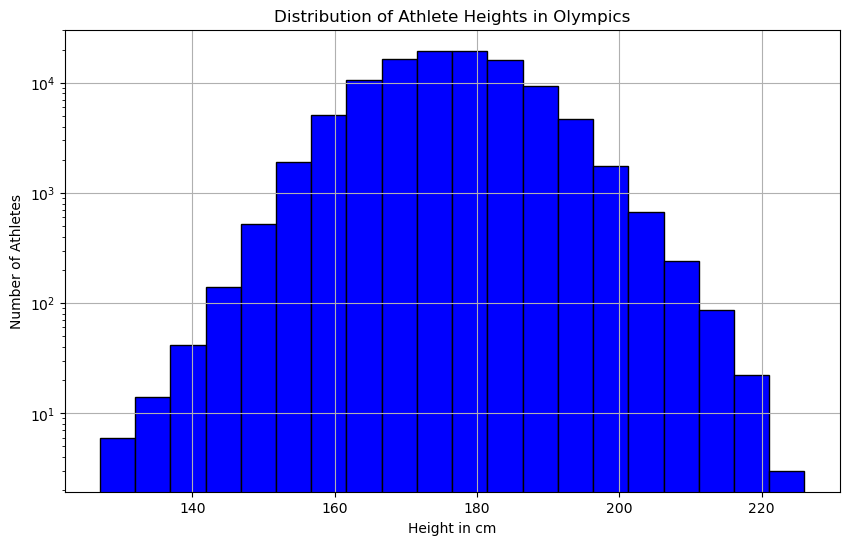

In [225]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'bios' and already loaded
# First, filter out rows where the height_cm data is missing
bios_filtered = bios.dropna(subset=['height_cm'])

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(bios_filtered['height_cm'], bins=20, color='blue', edgecolor='black')

plt.title('Distribution of Athlete Heights in Olympics')
plt.xlabel('Height in cm')
plt.ylabel('Number of Athletes')
plt.grid(True)

# Using a logarithmic scale for the y-axis if the data spread is wide
plt.yscale('log')

plt.show()